# Исследование рынка общественного питания Москвы для фонда Shut Up and Take My Money

- Автор: Котова Ольга
- Дата: 18.02.2025

### Цели и задачи проекта

<font color='#777778'>**Цель:** 
Провести исследовательский анализ рынка Москвы для инвесторов с целью открыть заведение общественного питания в Москве и определить: 
- место (кафе, ресторан, бар...);  
- расположение;
- цены.
 

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - Какие категории заведений представлены в данных?
    - Какие административные районы Москвы присутствуют в данных?   
    - Каких заведений больше — сетевых или несетевых?  
    - Сколько посадочных мест в заведениях?  
    - Отличается ли рейтинг заведений?
    - С какими данными показывают самую сильную корреляцию рейтинги заведений?
    - Топ-15 популярных сетей в Москве?
    - Размер среднего чека заведения  в зависимости от района Москвы? 
4. Сформулировать выводы по проведённому анализу.</font>

### Описание данных

<font color='#777778'>Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info.csv`

`name` — название заведения;  
`address` — адрес заведения;  
`district` — административный район, в котором находится заведение, например Центральный административный округ;  
`category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
`hours` — информация о днях и часах работы;  
`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
`chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
- 0 — заведение не является сетевым;  
- 1 — заведение является сетевым.  
`seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
- «Средний счёт: 1000–1500 ₽»;  
- «Цена чашки капучино: 130–220 ₽»;  
- «Цена бокала пива: 400–600 ₽».  
и так далее; 
    
`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:  
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
       
`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:  
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
</font>

### Содержимое проекта

<font color='#777778'>1. Загрузка данных и знакомство с ними.  
2. Предобработка данных.  
3. Исследовательский анализ данных.  
4. Итоговые выводы.</font>

---

## Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt

import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik==0.11.1
from phik import phik
from phik import resources


import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

     |████████████████████████████████| 596 kB 1.2 MB/s eta 0:00:01
  Created wheel for phik: filename=phik-0.11.1-py3-none-any.whl size=599822 sha256=1398a90db55258bc838e83194b27ed33e5ea2a2c37691b9fd1ceff672c664328
  Stored in directory: /home/jovyan/.cache/pip/wheels/47/a3/a2/54f05f62f6f8c5532fab1bb745f1bad3b5f1d53267efde761d
Successfully built phik


In [2]:
# Выгружаем данные в переменные rest_df и price_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
#Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_price.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие **промежуточные выводы**:
- Названия столбцов приведены к виду snake case.
- Представленные данные содержат строковые данные, которые находятся в корректном типе данных object по столбцам `id`, `name`, `category`, `address`, `district`, `hours` (часы работы включают диапазон времени и слова ежедневно и тд, т.е. приведение к datetime нецелесообразно). А также содеражат - числовые значения в столбцах `rating` и `seats` в типе float64 и `chain` - в   int64 и показывает, является ли заведение сетевым, и содержит значения 1 или 0 — размерность этих данных можно оптимизировать. Количество мест `seats` также можно перевести в целочисленный формат.
- Пропуски содержатся только в столбцах `hours` и `seats`. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
#Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_info.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о ценах в заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие **промежуточные выводы**:
- Названия столбцов приведены к виду snake case.
- Первый столбец `id` может быть использован для соединения исследуемых датасетов в один для дальнейшего анализа.
- Представленные данные содержат строковые данные, которые находятся в корректном типе данных object по столбцам `price`, `avg_bill`
а также содеражат - числовые значения в столбцах `middle_avg_bill` и `middle_coffee_cup` в корректном типе float64.
- Пропуски содержатся есть во всех столбцах, кроме `id`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.


In [7]:
df = rest_df.merge(price_df, on='id', how='left')

In [8]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Объединение прошло успешно, теперь все данные в одном датасете.

## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

Для оптимизации типов данных будем использовать метод pd.to_numeric исходя из намеченного плана при знакомстве с данными: для стобца`chain`, находящегося  в   int64, со значениями 1 или 0 — размерность оптимизируем, а также столбец `seats` приводим в целочисленный формат - посокльку в нем были пропуски, их предварительно меняем на 0.

In [10]:
#Сначала заменяем пропуски в seats на 0, без этого код выдаст ошибку, и меняем на int
df['seats'] = df['seats'].fillna(0)
df['seats'] =df['seats'].astype(int)
# Оптимизируем целочисленный тип данных
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['seats'] =pd.to_numeric(df['seats'],downcast='integer')   

In [11]:
# Проверим типы данных
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                  int16
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

В итоге произошло снижение размерности: в `chain` до int8, в `seats`до int16. В остальном типы данных подходят для анализа.

Подробнее изучим пропущенные значения в данных, обнаруженные на этапе знакомства:
посчитаем их количество в каждом столбце и изучим данные с пропущенными значениями. 

In [12]:
# выводим количество пропусков в каждом столбце в абсолютном значении
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# выводим количество пропусков в каждом столбце в относительном значении
df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.000000
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

По столбцу `hours` 536 пропусков, это менее 1%, игнорируем их.
Более 50% пропусков в столбцах `price`, `avg_bill`, `middle_avg_bill`. Пропуски занимают достаточное количество, что может быть объяснено источником предоставленных данных - часть из них была "добыта" из открытых источников, частично не смогли найти информацию. Поскольку нет информации о ценах, то и средние величины с пропусками, но при этом заменять их на какие-либо значения не представляется целесообразным: заполнять средним или медианой сложно, так как они могут зависеть от множества факторов и в итоге не будут корректным отражением реальности, а в итоге могут исказить реальную картину распределения. 
В связи с чем оставим пропуски (количество пропусков достаточно большое, чтобы их просто удалить), но будем учитывать это при анализе - всегда включая сортировку в значения, либо отсекая пропуски и заглушки (как 0 в `seats`).
Самое большое количество пропусков более 90% по столбцу `middle_coffee_cup`, что также объясняется тем, что не везде есть средняя стоимость именно по кофе. Поскольку столбец напрямую не используется в исследовании - оставим как есть.

Проверим данные на явные и неявные дубликаты. 
Отметим, что проверять на дубликаты целесообразно в паре: поле с названием и адресом заведения. Для оптимизации проверки названия заведения приведем к нижнему регистру для исключения неявных дубликатов, посмотрим, какие уникальные значения в столбцах категории заведения и районов, необходимо ли там провести аналогичную работу? Проверим неявные дубликаты — значения по `id` клиентов должны быть уникальными.

In [14]:
# Приводим названия и адреса к нижнему регистру
df['name']=df['name'].str.lower()
df['address']=df['address'].str.lower()
df[['name','address']].head()

,name,address
0,wowфли,"москва, улица дыбенко, 7/1"
1,четыре комнаты,"москва, улица дыбенко, 36, корп. 1"
2,хазри,"москва, клязьминская улица, 15"
3,dormouse coffee shop,"москва, улица маршала федоренко, 12"
4,иль марко,"москва, правобережная улица, 1б"


In [15]:
# смотрим на уникальные значения в категориях и районах
display(df['category'].unique())
display(df['district'].unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В обозначении категории и районов нет ошибок в регистре, теперь переходим к поиску дубликатов и их удалению в сочетании имя-адрес.

In [16]:
# ищем количество явных дубликатов в 'name', 'address', сохраняя первую встреченную строку 
df.duplicated(subset=['name', 'address'], keep='first').sum()


4

Обнаружили 4 дубликата.

In [17]:
# Удаляем дубликаты
df=df.drop_duplicates(subset=['name', 'address'], keep='first')

In [18]:
# Проверим, не осталось ли дубликатов
df.duplicated(subset=['name', 'address'], keep='first').sum()

0

Дубликаты удалены.

Для дальнейшей работы создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
# Находим строки, содержащие оба слова 'ежедневно' и 'круглосуточно' и создаём столбец `is_24_7` 
df['is_24_7'] = df['hours'].str.contains('ежедневно', case=False, na=False) & \
       df['hours'].str.contains('круглосуточно', case=False, na=False)

display (df[['hours','is_24_7']].head(11))

,hours,is_24_7
0,"ежедневно, 10:00–22:00",False
1,"ежедневно, 10:00–22:00",False
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,"ежедневно, 09:00–22:00",False
4,"ежедневно, 10:00–22:00",False
5,"ежедневно, 10:00–23:00",False
6,пн 15:00–04:00; вт-вс 15:00–05:00,False
7,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",False
8,"ежедневно, 10:00–22:00",False
9,"ежедневно, 12:00–00:00",False


На выводе первых 11 строк видим, что новый столбец заполнен корректно

---

### Промежуточный вывод

После предобработки данных снижена размерность встолбцах `chain` и `seats`. 
Нормализованы данные в текстовых столбцах `name` и `adress`, после чего проведено удаление дубликатов по сочетанию название-адресс (их было 4), в столбцах с районом и категорией, судя по выведенным уникальным значениям, нет необходимости в нормализции.
Пропуски заменены на 0 только в столбце `seats`, другие столбцы с пропусками оставлены без изменений, так как при уадлении пропусков по 1 из столбцов можно потерять важную информацию по другим, в связи с чем будем сортировать значения при исследовании данных.


## 3. Исследовательский анализ данных

Проводим исследовательский анализ данных по ряду вопросов заказчиков, с приведением визуализаций для большей наглядности.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Выведем столбчатую диаграмму.

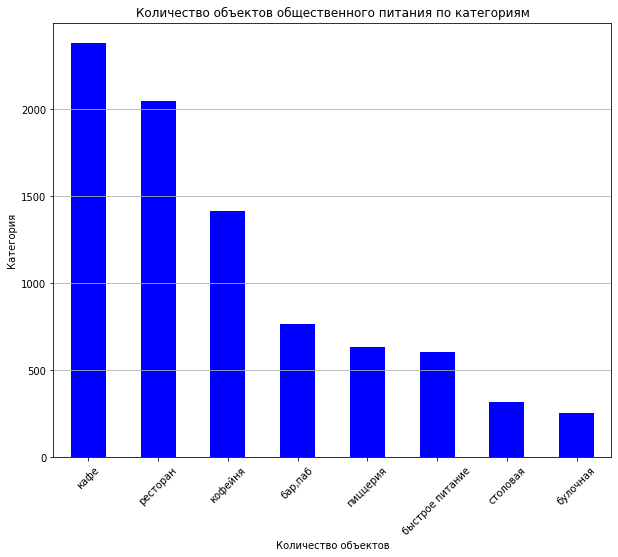

In [20]:
plt.figure (figsize=(10,8)) # Задаем размер фигуры
# Для наглядности будем сортировать значения в порядке убывания и потом выводить столбчатую диаграмму
df['category'].value_counts().plot(kind='bar', color='blue')
plt.title('Количество объектов общественного питания по категориям')
plt.xlabel('Количество объектов')
plt.ylabel('Категория')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

По диаграмме видим, что самое большое количество заведений - это кафе, на втором месте ресторан, далее кофейня. 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы. 

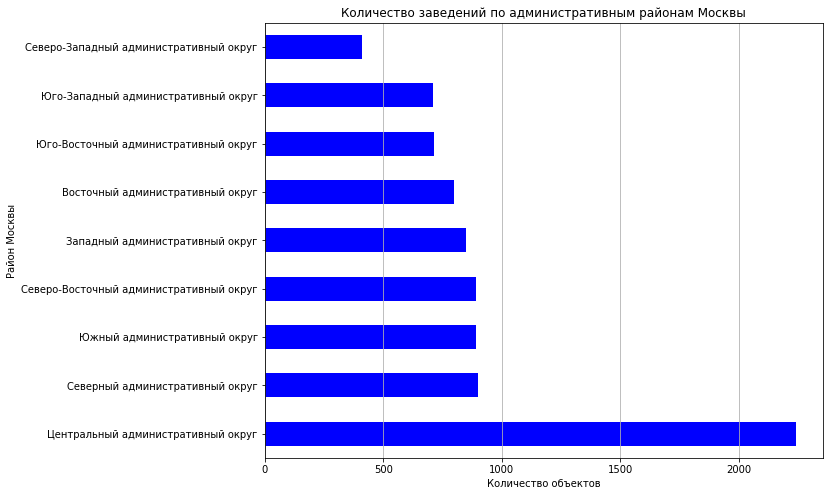

In [21]:
# Задаем размер фигуры
plt.figure (figsize=(10,8)) 
# Для наглядности будем сортировать значения в порядке убывания и потом выводить столбчатую диаграмму
df['district'].value_counts().plot(kind='barh', color='blue')
plt.title('Количество заведений по административным районам Москвы')
plt.xlabel('Количество объектов')
plt.ylabel('Район Москвы')
plt.grid(axis='x')
plt.show()

По количеству заведений по административным районам Москвы явный лидер - Центральный административны округ, на визуализации очевидно превышение более чем в два раза от остальных районов, большинство из которых имеет до 1000 заведений, 
Северо-западный административный округ явно в "отстающих" - в нем единственном менее 500 заведений.

В связи с чем изучим отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

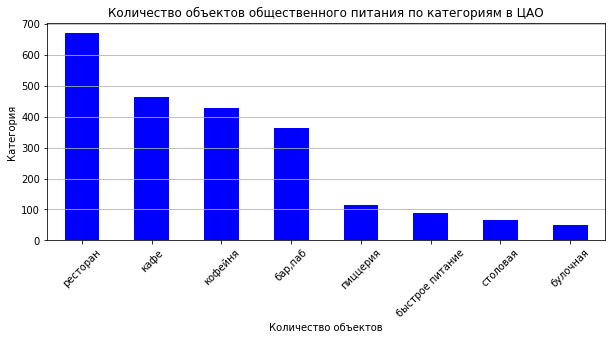

In [22]:
# Ищем данные для Центрального административного округа (ЦАО)
df_tcao = df[df['district'] == 'Центральный административный округ']

plt.figure (figsize=(10,4)) # Задаем размер фигуры
# Для наглядности будем сортировать значения
df_tcao['category'].value_counts().plot(kind='bar', color='blue')
plt.title('Количество объектов общественного питания по категориям в ЦАО')
plt.xlabel('Количество объектов')
plt.ylabel('Категория')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

В ЦАО больше всего ресторанов - свыше 650, далее кафе и кофейни - каждых более 400, но менее 500. Чуть более 350 - бар,паб Пиццерии перешли отметку в 100, Быстрое питание, столовая и болочная - менее 100. Булочных меньше всего.

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
# plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
# df['chain'].value_counts(normalize=True).plot(
#                kind='bar', # Тип графика — столбчатая диаграмма
#                color='blue', # Цвет по аналогии с другими графиками
#                rot=0, # Градус вращения подписи по оси Х
#                legend=False, # Выключаем легенду
#                title=f'Распределение сетевых и несетевых заведений')

# Настраиваем оформление графика
# plt.xlabel('Признак заведения (1 - сетевое, 0 - несетевое)')
# plt.ylabel('Доля сетеневых/несетевых заведений')
# Добавляем сетку графика
# plt.grid(axis='y')

# Выводим график
# plt.show()

Text(0, 0.5, '')

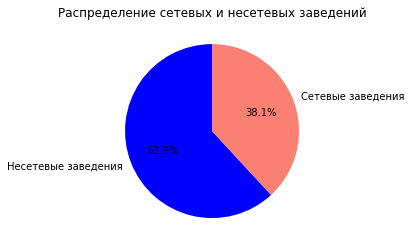

In [24]:
# Строим круговую диаграмму
df['chain'].value_counts().plot(
    kind='pie',  # Тип графика — круговая диаграмма
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,  # Начальный угол
    colors=['blue', 'salmon'],  # Цвета секторов
    legend=False,  # Выключаем легенду
    labels=['Несетевые заведения','Сетевые заведения'])

# Настраиваем оформление графика
plt.title('Распределение сетевых и несетевых заведений')
plt.ylabel('') 

В результате видим, что больше несетевых заседений. При этом, доля сетевых заведений все же достаточно высока: почти 0.4

Теперь изучим количество сетевых и несетевых заведений по категориям. Используем groupby() для группировки по категориям  и определеяем размер каждой группы с помощью size(). Метод unstack() переводит информацию о статусе сетевой-несетевой в столбцы - это понадобится для дальнейшей визуализации.

In [25]:
# Подсчитываем количество сетевых и несетевых заведений по категориям
chain_counts = df.groupby(['category', 'chain']).size().unstack()
chain_counts = chain_counts.sort_values(by=0, ascending=False) # сортировка по убыванию по несетевым 
# Выводим результаты
chain_counts


chain,0,1
category,,
кафе,1597,779
ресторан,1313,729
кофейня,693,720
"бар,паб",596,168
быстрое питание,371,232
пиццерия,303,330
столовая,227,88
булочная,99,157


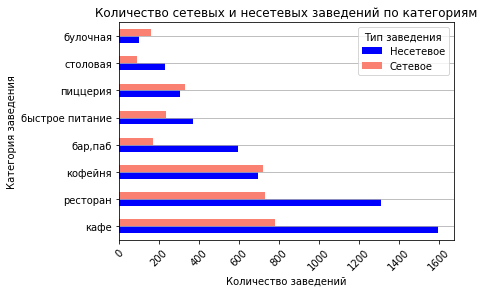

In [26]:
# Строим график
chain_counts.plot(kind='barh', color=['blue', 'salmon'])
plt.title('Количество сетевых и несетевых заведений по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Категория заведения')
plt.xticks(rotation=45)
plt.legend(title='Тип заведения', labels=['Несетевое', 'Сетевое'])
plt.grid(axis='y')
plt.show()

Несетевых заведений в основном больше, но обратим внимание на почти одинаковое количество как сетевых, так и несетевых кофеен и пиццерий с небольшим превышением сетевых, значительно больше сетевых булочных, а вот значения несетевых превышают сетевые в два раза и более - у ресторана и кафе, а самый большой перевес более, чем в три раза в пользу несетевых у баров, пабов.

Мы видим, что чаще являются сетевыми кафе, рестораны и кофейни, далее пиццерии и быстрое питание, реже всего столовые. При этом, кафе, ресторанов и на третьем месте - кофеен больше и среди несетевых. Далее идут среди несетевых бар, паб.  

Построим графики для отражения доли заведений, это даст больше наглядности.
Доли сетевых и несетевых заведений вычислим делением количества заведений каждой категории на общее количество заведений в этой категории методом div().

In [27]:
# Подсчитываем общее количество заведений по категориям
total_counts = chain_counts.sum(axis=1)

# Рассчитываем доли сетевых и несетевых заведений, используем метод div() 
#с параметром axis=0, чтобы деление было по строкам.
chain_share = chain_counts.div(total_counts, axis=0)
chain_share = chain_share.sort_values(by=0, ascending=False) # сортировка по убыванию по несетевым

# Выводим результаты
chain_share


chain,0,1
category,,
"бар,паб",0.780105,0.219895
столовая,0.720635,0.279365
кафе,0.672138,0.327862
ресторан,0.642997,0.357003
быстрое питание,0.615257,0.384743
кофейня,0.490446,0.509554
пиццерия,0.478673,0.521327
булочная,0.386719,0.613281


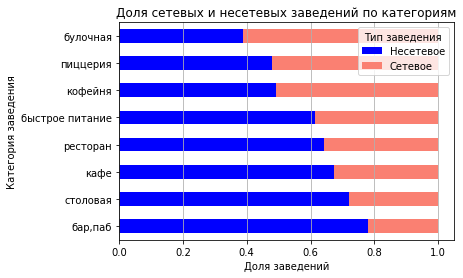

In [28]:
# Строим график, stacked=True утсанавливаем, чтобы диаграмма получилась с накоплением
chain_share.plot(kind='barh', stacked=True, color=['blue', 'salmon'])
plt.title('Доля сетевых и несетевых заведений по категориям')
plt.xlabel('Доля заведений')
plt.ylabel('Категория заведения')
plt.legend(title='Тип заведения', labels=['Несетевое', 'Сетевое'])
plt.grid(axis='x')
plt.show()

Видим подтверждение наших прежних выводов. Самая большая доля несетевых у баров, пабов. Также примерно равное количество как сетевых, так и несетевых пиццерий и кофеен (примерно по 50%), а рестораны и кафе чаще всего несетевые, как и быстрое питание (за 60%), а самая большая доля сетевых у булочных. 

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны?   
Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. 
Помним, что пропуски мы заменяли на ноль.
Для начала посмотрим общую информацию по столбцу.

In [29]:
df['seats'].describe()

count    8402.000000
mean       61.802904
std       107.160755
min         0.000000
25%         0.000000
50%        20.000000
75%        85.000000
max      1288.000000
Name: seats, dtype: float64

Видим, что минимальное значение 0 и 25 процентиль тоже 0, целесообразно при анализе данного столбца нули исключить как аномальное значение, т.к. мы видим, что они не дают увидеть реальную картину.

In [30]:
# Создадим отдельны датафрейм без 0 значений
df_for_seats=df[df['seats']>0]

df_for_seats['seats'].describe()

count    4656.000000
mean      111.526632
std       123.197930
min         1.000000
25%        40.000000
50%        78.000000
75%       141.000000
max      1288.000000
Name: seats, dtype: float64

Значения сильно изменились, однако по-прежнему, медиана и среднее значение далеки друг от друга, максимальное значение видится явным выбросом, отклонение данных значительно.

Проанализировать выбросы и распределение значений по категориям будет удобнее на диаграмме размаха. Построим ее сразу для категорий заведений общественного питания с помощью библиотеки seaborn. Перед этим отсортируем по значению медианы и через pd.Categorical  - для указания порядка категорий.  

In [31]:
# Вычисляем медиану для каждой категории
median_values = df_for_seats.groupby('category')['seats'].median().sort_values()

# Сортируем категории по медиане
# Передаем categories=median_values.index, чтобы установить порядок в соответствии с вычисленными медианными значениями
df_for_seats['category'] = pd.Categorical(df_for_seats['category'], categories=median_values.index, ordered=True)


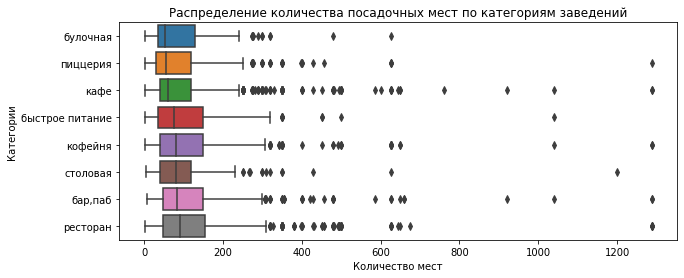

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений 
sns.boxplot(x='seats', y='category', data=df_for_seats)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Количество мест')
plt.ylabel('Категории')

# Выводим график
plt.show()

На графике видим большое количество выбросов по всем категориям - примерно от 300 до 1288 (что определено методом describe выше), в связи с чем достаточно сложно оценить сам размах. Отрицательных выбросов нет.

Отключим выбросы на графике.

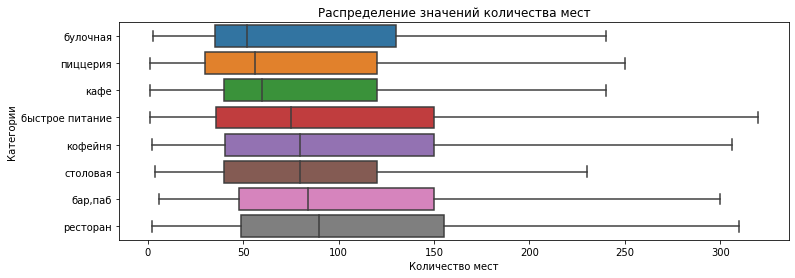

In [33]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений
sns.boxplot(x='seats', y='category', data=df_for_seats, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества мест')
plt.xlabel('Количество мест')
plt.ylabel('Категории')

# Выводим график
plt.show()

Мы видим, что разброс значений по местам от 0 до более 300, но основная масса значений находится по всем категориям примерно от 25 до 150 мест. Цифры похожи на реальность: выбросы могут быть объяснены, напрмер, наличием фудкортов в ТЦ, где действительно может быть большое количество мест. При этом, максимальное значение на почти 1300 мест считаем аномальным, ошибкой в данных.
Небольшое количество мест может быть свойственно, например, небольшим семейным кафе или частным пиццериям, булочным.

Для определения для каждой категории заведений наиболее типичного количества посадочных мест целесообразнее смотреть на  медиану. При достаточно большом разбросе среднее скорее всего не отобразит реальную картину. Однако выведем и сравним оба значения.

In [34]:
# Считаем значение медианы по датафрейму без 0 в seats
median_table = pd.pivot_table(data=df_for_seats, index='category', values='seats', aggfunc='median')
# Считаем срезнее значение по датафрейму без 0 в seats
mean_table = pd.pivot_table(data=df_for_seats, index='category', values='seats', aggfunc='mean')

# Объединяем таблицы по столбцу категории
mm_table = median_table.merge(mean_table, on='category')

# Выводим результат объединения
mm_table

,seats_x,seats_y
category,,
булочная,52,96.562044
пиццерия,56,96.762590
кафе,60,101.017903
быстрое питание,75,104.268882
кофейня,80,114.870702
столовая,80,102.886792
"бар,паб",84,125.552916
ресторан,90,123.843875


Действительно, средние значения слишком отличнаяются от медианы, скорее всего более далеки от реальности, поэтому типичное количество мест будем считать по медиане. Для наглядности снова построим график.

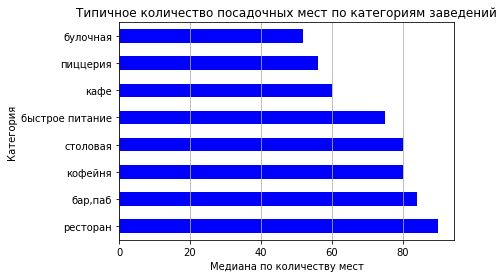

In [35]:
# Сортируем по медиане
median_table = median_table.sort_values(by='seats', ascending=False)

median_table.plot(kind='barh', # Тип графика — линейчатая диаграмма
               color='blue', # Цвет по аналогии с другими графиками
               legend=False, # Выключаем легенду
               title=f'Типичное количество посадочных мест по категориям заведений')

# Настраиваем оформление графика
plt.xlabel('Медиана по количеству мест')
plt.ylabel('Категория')
# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Типичное количество посадочных мест по категориям заведений: для булочной и пиццерии - около 55, 60 для кафе, 75 в быстром питании, по 80 в столовой и кофейне и примерно также в пабе,баре (84), а в ресторане больше всех - 90.

---

### Задача 5

Исследуем рейтинг заведений через визуализацию среднего рейтинга по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [36]:
# Подсчитываем средний рейтинг заведений по категориям
mean_rating= df.groupby('category')['rating'].mean()

mean_rating= mean_rating.sort_values()
# Выводим результаты
mean_rating


category
быстрое питание    4.050249
кафе               4.124285
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290402
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float64

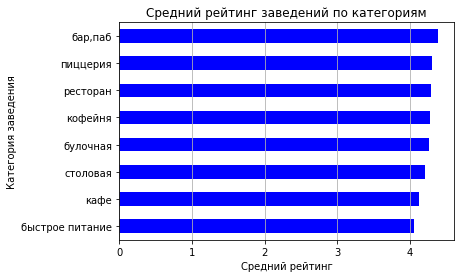

In [37]:
# Строим график
mean_rating.plot(kind='barh', color=['blue'])
plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория заведения')
plt.grid(axis='x')
plt.show()

Средний рейтинг совсем незначительно отличается по категориям. У всех он выше 4, его значения варьируются от 4,1 до 4.4. Выше всех у баров,пабов.


---

### Задача 6

С какими данными показывают самую сильную корреляцию рейтинги заведений? 

Используем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

In [38]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category',
                         'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
display ('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(
    by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


'Корреляционная матрица с коэффициентом phi_k для переменной rating'

,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


Наибольшая корреляция рейтинга наблюдается с ценой (0.22), районом (0.20) и категорией (0.19). Для остальных признаков коэффициент корреляции снижается с 0.15 до 0.

Важно помнить, что phi_k сообщает только о наличии связи между данными. На сам характер связи коэффициент phi_k не указывает, поэтому после получения коэффициента следует продолжить анализ. 

Например, можно предположить, что повышение рейтинга положительно связано с ценой (чем больше рейтинг, тем выше цены). Такую гипотезу можно проверить при анализе данных. 
Однако перед этим визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn

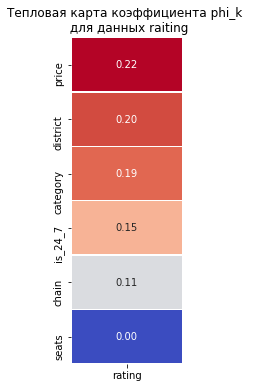

In [39]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками 
data_heatmap = correlation_matrix.loc[correlation_matrix.index !='rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных raiting')


# Выводим график
plt.show()

Теперь проверим связь цен и рейтинга.


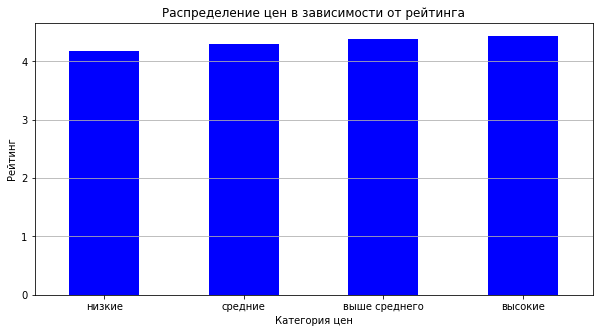

In [40]:
# Строим график столбчатой диаграммы
grouped = df.groupby('price')['rating'].mean().sort_values()
grouped.plot(kind='bar',
               title=f'Распределение цен в зависимости от рейтинга',
               ylabel='Рейтинг',
               xlabel='Категория цен',
               rot=0,
               color= 'blue',
               figsize=(10,5))
plt.grid(axis='y')
plt.show()

Гипотеза про связь цен и рейтинга подтвердилась, хотя различия в рейтинге и небольшие - рейтинг самый высокий для высоких цен, и становится ниже для цен выше среднего и средних, самый низкий рейтинг - для низкий цен.

---

### Задача 7

Найдем топ-15 популярных сетей в Москве по названиям заведений и посчитаем для них значения среднего рейтинга. 
Под популярностью понимается количество заведений этой сети в регионе. 
К какой категории заведений они относятся? 

In [41]:
# Фильтруем только сетевые заведения, где chain=1
df_chain_1 = df[df['chain'] == 1]

# Группируем и считаем средний рейтинг и количество заведений
grouped_chain_1 = df_chain_1.groupby('name').agg(mean_rating=('rating', 'mean'), count=('name', 'count')
)

# Сортируем по популярности и берем топ-15
top_chain_1 = grouped_chain_1.sort_values(by='count', ascending=False).head(15)
top_chain_1


,mean_rating,count
name,,
шоколадница,4.177500,120
домино'с пицца,4.169737,76
додо пицца,4.286486,74
one price coffee,4.064789,71
яндекс лавка,3.872464,69
cofix,4.075385,65
prime,4.116000,50
хинкальная,4.322727,44
кофепорт,4.147619,42


Получили искомые данные: топ-15 популярных сетей в Москве по названиям заведений со значением среднего рейтинга. 
Посмотрим на диаграмме на популярность

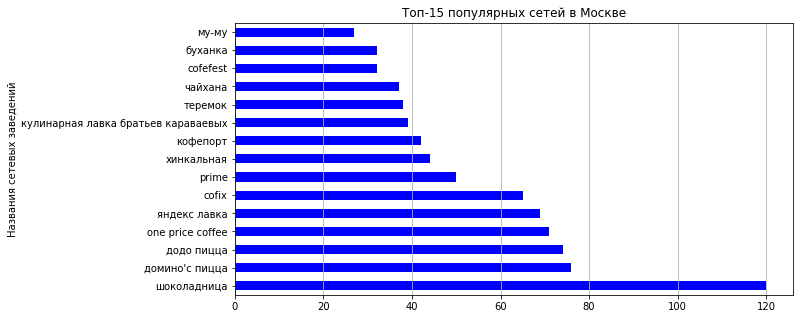

In [42]:
# Строим график столбчатой диаграммы для популярных сетевых заведений
top_chain_1['count']. plot(kind='barh',
               title=f'Топ-15 популярных сетей в Москве',
               ylabel='Количество заведений',
               xlabel='Названия сетевых заведений',
               rot=0,
               color= 'blue',
               figsize=(10,5))
plt.grid(axis='x')
plt.show()

Видим, что самым популярным сетевым заведением Москвы с большим отрывом является Шоколадница с количеством в 120 заведений, 
далее рядом четверка: домино'с пицца (76), додо пицца	(74), one price coffee	(71), и яндекс лавка (69).  Меньше всего заведений у му-му.
Теперь рассмотрим на графике средние значения рейтинга для них - для наглядности используем не столбчатую диаграмму (на которой все значения примерно одинковы - около 4), а линейный график библиотеки seaborn, чтобы подчеркнуть разницу и проследить зависимость.

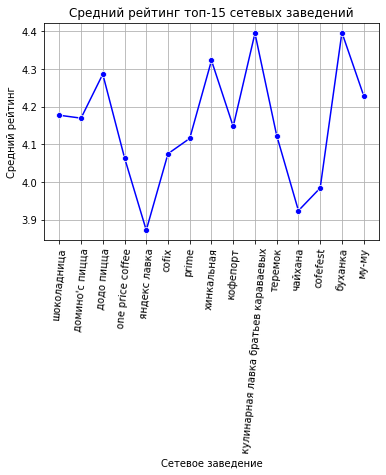

In [43]:
# Строим линейный график для среднего рейтинга популярных сетевых заведений
sns.lineplot(x='name', y='mean_rating', data=top_chain_1, color='blue', marker='o')
plt.title('Cредний рейтинг топ-15 сетевых заведений')
# Поворачиваем подписи по оси X для лучшей читаемости
plt.xticks(rotation=85)
plt.xlabel('Сетевое заведение')
plt.ylabel('Средний рейтинг')
plt.grid()
plt.show()

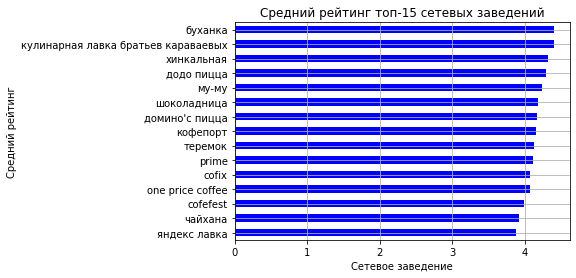

In [44]:
top_chain_1['mean_rating'].sort_values().plot(kind='barh', color='blue')
                                 
plt.title('Cредний рейтинг топ-15 сетевых заведений')
# Поворачиваем подписи по оси X для лучшей читаемости
plt.xlabel('Сетевое заведение')
plt.ylabel('Средний рейтинг')
plt.grid()
plt.show()

Средний рейтинг не зависит от популярности заведения, у Яндекс лавки, входящей в пятерку самых популярных, он самый низкий. Самые высокие рейтинги, при этом, у Караваевых и Буханки, находящихся во сторой половине (а Буханка на 14 месте) из топ-15. 
Однако, заметим, что значения всех этих рейтингов достаточно высоки и находятся около 4!

Осталось ответить на вопрос - к какой категории заведений относится топ-15. Выведем таблицу - по названиям (где каждому названию соответствует категория или несколько категорий, также можно построить диаграмму по количеству разных категорий.

In [45]:
top_chain_1.reset_index() # убираем название из индекса
# Мы хотим получить категории для названий заведений
categories_top_15 = top_chain_1.merge(df_chain_1, on='name', how='left') 
final_categories_top_15=categories_top_15[['name','category']]
df_unique_15 = final_categories_top_15.drop_duplicates(subset=['name','category']) # удалим дубликаты для наглядности
# Выводим таблицу - название в топ-15 популярных сетей Москвы -с категорией
df_unique_15

,name,category
0,шоколадница,кофейня
7,шоколадница,кафе
120,домино'с пицца,пиццерия
196,додо пицца,пиццерия
270,one price coffee,кофейня
341,яндекс лавка,ресторан
410,cofix,кофейня
475,prime,ресторан
512,prime,кафе
525,хинкальная,быстрое питание


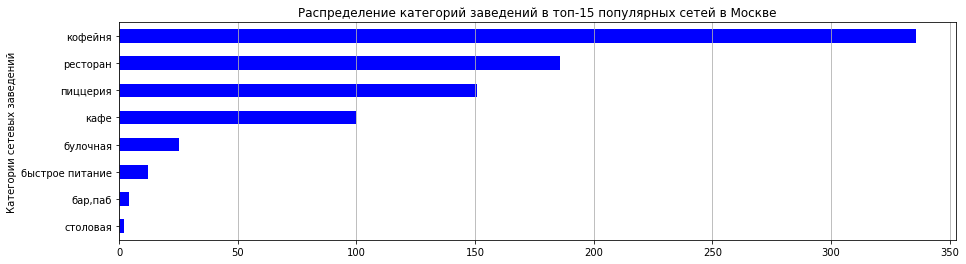

In [46]:
# Рассчитываем количество заведений по категориям в топ-15 популярных сетевых
category_count = final_categories_top_15.groupby('category')['category'].count().sort_values()
# Строим диаграмму
category_count.plot(kind='barh',
               title=f'Распределение категорий заведений в топ-15 популярных сетей в Москве',
               ylabel='Количество заведений',
               xlabel='Категории сетевых заведений',
               color= 'blue',
               figsize=(15,4))
plt.grid(axis='x')
plt.show()

Больше всего кофеен (к которым в том числе относится шоколадница), с большим отрывом, далее рестораны и пиццерии.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? 


In [47]:
# выведем основные статичтические характеристики
middle_bill= df.groupby('district')['middle_avg_bill'].agg(['mean', 'median', 'std', 'count'])

middle_bill


,mean,median,std,count
district,,,,
Восточный административный округ,820.626923,575.0,850.903310,260
Западный административный округ,1053.225490,1000.0,779.008536,306
Северный административный округ,927.959627,650.0,912.609221,322
Северо-Восточный административный округ,716.611296,500.0,591.232153,301
Северо-Западный административный округ,822.222930,700.0,595.055218,157
Центральный административный округ,1191.057547,1000.0,920.014707,1060
Юго-Восточный административный округ,654.097938,450.0,566.825663,194
Юго-Западный административный округ,792.561702,600.0,559.173122,235
Южный административный округ,834.398089,500.0,2008.640596,314


Центральный админимтративный округ лидирует по размеру среднего чека, медианы у него аналогична Западному административному округу, но среднее и стандарное отклонение больше. Среднее значение олтичается от медианы, при том значительно, поскольку было достаочное количество пропусков в данных, двидится более целесообразность проводить анализ по медиане.

Посмотрим на диаграмму размаха, чтобы оценить выбросы для более корректного анализа.

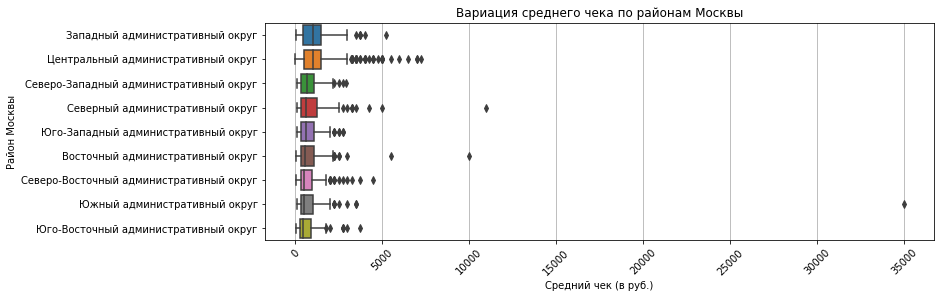

In [48]:
# Сортируем по медиане
middle_bill_sorted = middle_bill.sort_values(by='median', ascending=False).index

# Строим диаграмму размаха
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='middle_avg_bill', y='district', order=middle_bill_sorted)
plt.title('Вариация среднего чека по районам Москвы')
plt.ylabel('Район Москвы')
plt.xlabel('Средний чек (в руб.)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

Действительно большие выбросы: у всех большинства округов до 5000, у Центрального округа - примерно от 3000 до 5000 достаточно большое количество данных, есть значения от 5 до 10 тысяч. Аномальные значения в Северном, Восточном и Южных округах Москвы.

Точнее оценить картину основного массива средних чеков выбросы мешают (средний чек в 35000 в Южном округе скорее всего ошибка в данных), снова скроем их на диаграмме.

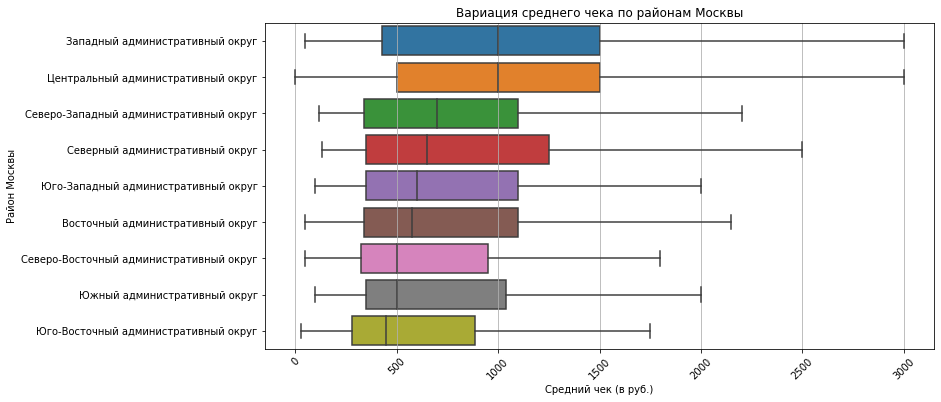

In [49]:
# Строим диаграмму размаха
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='middle_avg_bill', y='district',  order=middle_bill_sorted, showfliers=False)
plt.title('Вариация среднего чека по районам Москвы')
plt.ylabel('Район Москвы')
plt.xlabel('Средний чек (в руб.)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

Теперь наглядно видно, что с самым большим значением среднего чека в Центральном административном округе конкурирует лишь Западный административный округ, далее идут Северо-западный и Северные административные округа, за ним Юго-западный (медианы 700-650-700 соответственно). Уже дальше идет остальные округа. Закономерно, центр Москвы - самый дорогой, далее близкий к нему  север и запад, остальные более отдаленные (южные и восточные) районы имеют более низкие в сравнении с центром значения среднего чека. Посмотрим наглядно через диаграмму:

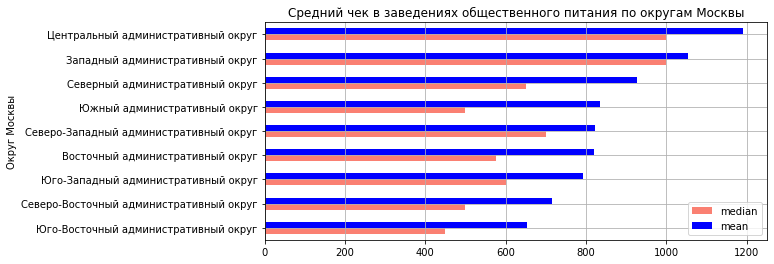

In [50]:
# Строим диаграмму
middle_avg_bill= df.groupby('district')['middle_avg_bill'].agg(['median','mean'])
middle_avg_bill=middle_avg_bill.sort_values(by='mean')
middle_avg_bill.plot(kind='barh',
               title=f'Средний чек в заведениях общественного питания по округам Москвы',
               ylabel='Средний чек',
               xlabel='Округ Москвы',
               color= ['salmon','blue'],
               figsize=(9,4))

plt.grid()
plt.show()

Налицо разница между средним значением и медианой. Однако самый высокий средний чек по обеим величинам - Ценральный и западный округа (по среднему центральный опережает запад, хотя по медиане равны). 
Самые низкие значения среднего чека по медиане - ЮВ, СВ, Восточный и Южный административные округа.
По среднему в отстающих ЮВ и СВ, но далее-ЮЗ, и добавляется СЗ к отстающим (по медиане он на 3 месте с начала).

---

### Задача 9

Проведем исследования других данных и их взаимосвязи. 

Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


Для начала посмотрим зависимость стоимость чашки кофе от категории заведения и района Москвы

In [51]:
# Группировка по типам заведений и расположению, вычисление среднего чека по кофе
grouped_middle_coffee_cup = pd.pivot_table(data=df, 
                                           index='district', 
                                           columns= 'category', 
                                           values='middle_coffee_cup',
                                           aggfunc =['mean']).reset_index()
grouped_middle_coffee_cup


district    mean                  \
category                                          бар,паб быстрое питание   
0                Восточный административный округ     NaN             NaN   
1                 Западный административный округ  175.00             NaN   
2                 Северный административный округ     NaN             NaN   
3         Северо-Восточный административный округ     NaN             NaN   
4          Северо-Западный административный округ     NaN             NaN   
5              Центральный административный округ  216.25             NaN   
6            Юго-Восточный административный округ     NaN           140.0   
7             Юго-Западный административный округ     NaN             NaN   
8                    Южный административный округ  210.00             NaN   

                                      
category   кафе     кофейня пиццерия  
0           NaN  174.023810      NaN  
1           NaN  189.938776      NaN  
2         112.0  165.789474      NaN  
3           NaN  165.333333      NaN  
4          75.0  165.523810    150.0  
5           NaN  187.518519      NaN  
6           NaN  151.088235      NaN  
7           NaN  184.176471    160.0  
8         117.5  158.488372      NaN

Отмеченное ранее большое количество пропусков столбце со средней стоимостью  чашки кофе видно и здесь.
Зато по всем кофейням данные есть!
Еще заметим, что чашка кофе в баре, пабе дороже, чем в кофейне, но зато дешевле выпить кофе можно в кафе или пиццерии.

Визуализируем данные по кофейне, чтобы оценить разницу  в средней с
стоимости  чашки кофе в зависимости от района.

In [52]:
df.columns


Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup', 'is_24_7'],
      dtype='object')

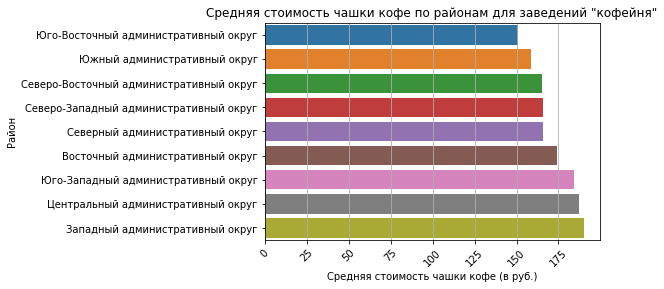

In [53]:
# Фильтрация данных для заведений "кофейня"
df_coffee = df[df['category'] =='кофейня']
# Группировка по районам и вычисление среднего значения стоимости middle_coffee_cupчашки кофе
grouped_df_coffee=df_coffee.groupby('district')['middle_coffee_cup'].mean().reset_index()
# Добавим сортировку
grouped_df_coffee=grouped_df_coffee.sort_values(by='middle_coffee_cup')
# Визуализация
sns.barplot(data=grouped_df_coffee, x='middle_coffee_cup', y='district')
plt.title('Средняя стоимость чашки кофе по районам для заведений "кофейня"')
plt.ylabel('Район')
plt.xlabel('Средняя стоимость чашки кофе (в руб.)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()


История с самым дорогим кофе похожа на средний чек в разрезе Центрального округа: в центре попить кофе дороже всего. За ним идет Западный, похоже. Однако прямой зависимости, как со средним чеком, не наблюдается. Правило "чем дальше от центра, тем дешевле" - не работает. То есть зависимости прямой средней стоимости кофе в кофейне от района не наблюдается.

Теперь посмотрим, если зависимость часов работы заведений от расположения или типа заведения.


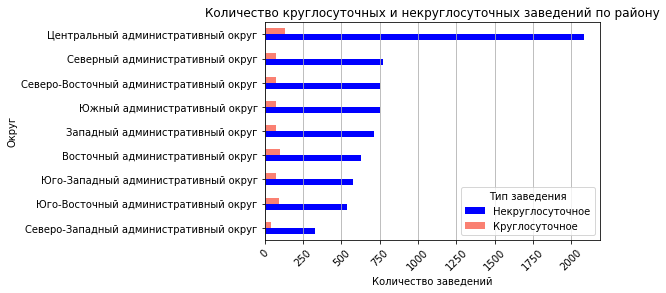

In [54]:
# Группируем по количеству по признаку круглосуточное или нет заведение
grouped_hours_district = pd.pivot_table(data=df, 
                                          index='district', 
                                          columns='is_24_7', 
                                          values='hours',
                                          aggfunc='count', 
                                          fill_value=0)  # Заполнить NaN нулями

# Сортируем 
grouped_hours_district = grouped_hours_district.sort_values(by=0)

# Визуализируем
grouped_hours_district.plot(kind='barh', color=['blue','salmon'])  # Обратите внимание на порядок цветов
plt.title('Количество круглосуточных и некруглосуточных заведений по району')
plt.xlabel('Количество заведений')
plt.ylabel('Округ')
plt.xticks(rotation=45)
plt.legend(title='Тип заведения', labels=['Некруглосуточное', 'Круглосуточное'])
plt.grid(axis='x')
plt.show()


Интересно, что самое большое количество круглосуточных и некруглосуточных заведений также в Центральном административном округе, однако прямой зависимости от удаления от центра не видно: восток спорит с западом, юг с севером примерно наравне.

Теперь посмотрим, если зависимость часов работы заведений от типа заведения.

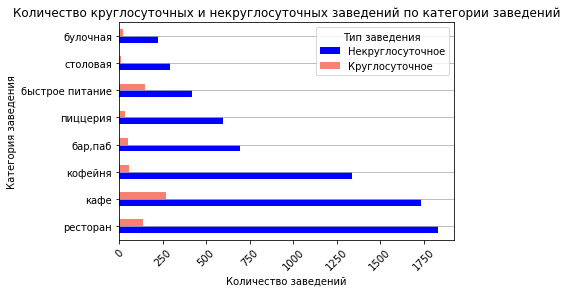

In [55]:
# Группируем по количеству по признаку круглосуточное или нет заведение
grouped_hours_category = pd.pivot_table(data=df, 
                                         index='category', 
                                         columns='is_24_7', 
                                         values='hours',
                                         aggfunc='count', 
                                         fill_value=0)  # Заполним NaN нулями

# Сортируем по сумме заведений (по обеим колонкам вместе)
grouped_hours_category = grouped_hours_category.sort_values(by=0, ascending=False)

# Визуализируем
grouped_hours_category.plot(kind='barh', color=['blue','salmon'])  # Обратите внимание на порядок цветов
plt.title('Количество круглосуточных и некруглосуточных заведений по категории заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Категория заведения')
plt.xticks(rotation=45)
plt.legend(title='Тип заведения', labels=['Некруглосуточное', 'Круглосуточное'])
plt.grid(axis='y')
plt.show()

Зависимость часов работы заведений от типа заведения присутствует.
Больше всего круглосуточных ресторанов и кафе, есть кофейни. А вот количество круглосуточных столовых и булочных стремится к нулю.

Проверим, выше ли значение среднего чека в круглосуточных заведениях?

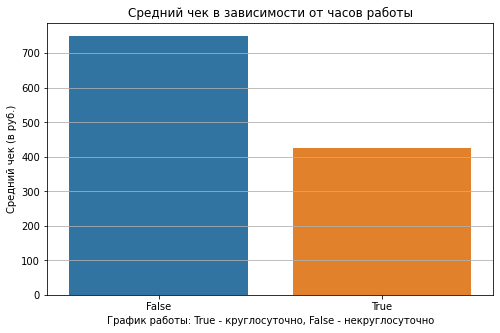

In [56]:
grouped = df.groupby('is_24_7')['middle_avg_bill'].median().reset_index()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='is_24_7', y='middle_avg_bill')
plt.title('Средний чек в зависимости от часов работы')
plt.ylabel('Средний чек (в руб.)')
plt.xlabel('График работы: True - круглосуточно, False - некруглосуточно')
plt.grid(axis='y')
plt.show()


Оказывается нет, это в круглосуточных магазинах обычно дороже, а вот средний чек выше в некруглосуточных заведениях.

---

### Промежуточный вывод

В результате анализа выведены и подтверждены визуализациями следующие заключения: 

- по категориям заведений общественного питания: самое большое количество заведений - это кафе, самое маленькое - столовых.
- по распределению количества заведений по административным районам Москвы лидер - Центральный административны округ, Северо-западный административный округ на последнем месте. В ЦАО больше всего ресторанов, кафе и кофеен, булочных меньше всего.  
- несетевых заседений больше, чем несетевых, но доля сетевых заведений все же достаточно высока: почти 0.4. Чаще являются сетевыми кафе, рестораны и кофейни. Самая большая доля несетевых у баров, пабов. 
- по количеству посадочных мест в заведениях в данных встречаются аномальные значения или выбросы  основной разброс значений по местам от 0 до более 300, но основная масса значений находится по всем категориям примерно от 25 до 150 мест.   
- средний рейтинг совсем незначительно отличается по категориям.  
- самую сильную корреляцию рейтинга заведений phi_k показывает с ценой (0.22), районом (0.20) и категорией (0.19). Для остальных признаков коэффициент корреляции снижается с 0.15 до 0. Гипотеза про связь цен и рейтинга подтвердилась при более глуюоком анализе.  
- выдедены топ-15 популярных сетей в Москве по названиям заведений, самым популярным сетевым заведением Москвы с большим отрывом является Шоколадница, отрацается зависимость среднего рейтинга популярности заведения. Самые популярные - кофейни.
- по среднему чеку: центр Москвы - самый дорогой, далее близкие к нему север и запад, остальные более отдаленные (южные и восточные) районы имеют более низкие в сравнении с центром значения среднего чека.
- прямой зависимости, как со средним чеком, не наблюдается по средней стоимости чашки кофе, хотя ЦАО - снова самый "дорогой". 
- средний чек выше в некруглосуточных заведениях.


## 4. Итоговый вывод и рекомендации

1. **Общий обзор проделанной работы**  
- Были загружены данные datasets/rest_info.csv — информация о заведениях общественного питания и datasets/rest_price.csv с информацией о ценах.   
- Датафреймы были объединены в один для удобства анализа. Удалено 4 дубликата по совпадению название-адрес.  
- Произведено снижение размерности: в `chain` до int8, в `seats`до int16.  
- Обнаружено достаточное количество пропусков, в столбце `seats` заменены на заглушку 0, в остальных ввиду значительного количества проигнорированы с целью сохранить данные, близвие к реальности (без замен на средние значения) по другим столбцам для дальнешего анализа.  
- Добавлено новое булевое поле `is_24_7` с графиком работы: True - круглосуточно, False - некруглосуточно.

2. **Ответы на исследовательские вопросы**

2.1. Количество объектов общественного питания по каждой категории:  
- самое большое количество заведений - это кафе, на втором месте ресторан, далее кофейня, меньше всего булочных и столовых.

2.2. Распределение количества заведений по административным районам Москвы:  
По количеству заведений по административным районам Москвы явный лидер - Центральный административны округ, на визуализации очевидно превышение более чем в два раза от остальных районов, большинство из которых имеет до 1000 заведений, Северо-западный административный округ явно в "отстающих" - в нем единственном менее 500 заведений.  
В ЦАО:
- рестораны - свыше 650, 
- от 400 до 500 - кафе и кофейни,
- более 350 - бар,паб 
- пиццерии перешли отметку в 100,
- быстрое питание, столовая и болочная - меньше остальных.

2.3. Соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения: 
- больше несетевых заседений, чем сетевых.  
- чаще являются сетевыми кафе, рестораны и кофейни, далее пиццерии и быстрое питание, реже всего столовые. При этом, кафе, ресторанов и на третьем месте - кофеен больше и среди несетевых. Далее идут среди несетевых бар, паб.
- почти одинаковое количество как сетевых, так и несетевых кофеен и пиццерий (примерно по 50%), а рестораны и кафе чаще всего несетевые, как и быстрое питание (за 60%), а самый большой перевес в пользу несетевых - у баров, пабов. 

2.4. Количество посадочных мест в заведениях. 
Обычно в заведениях общественного питания от 0 до 300 мест, но основная масса значений находится по всем категориям примерно от 25 до 150 мест.Выбросы могут быть объяснены, напрмер, наличием фудкортов в ТЦ, где действительно может быть большее количество мест. Небольшое количество мест может быть свойственно, например, небольшим семейным кафе или частным пиццериям, булочным.
Типичное количество посадочных мест по категориям заведений: для булочной и пиццерии - около 55, 60 для кафе, 75 в быстром питании, по 80 в столовой и кофейне и примерно также в пабе,баре (84), а в ресторане больше всех - 90.

2.5. Рейтинг заведений:
Усреднённые рейтинги для разных типов общепита не сильно отличаются: у всех он выше 4, его значения варьируются от 4,1 до 4.4.

2.6. С какими данными показывают самую сильную корреляцию рейтинги заведений?
Использована матрица корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 
Наибольшая корреляция рейтинга наблюдается с ценой (0.22).   
Связь цен и рейтинга подтвердилась, хотя различия в рейтинге и небольшие - рейтинг самый высокий для высоких цен, и становится ниже для цен выше среднего и средних, самый низкий рейтинг - для низкий цен.

2.7. В топ-15 популярных сетей в Москве по названиям заведений лидирует с большим отрывом Шоколадница с количеством в 120 заведений, далее рядом четверка: домино'с пицца (76), додо пицца (74), one price coffee (71), и яндекс лавка (69). Меньше всего заведений у му-му. При этом, средний рейтинг не зависит от популярности заведения, у Яндекс лавки, входящей в пятерку самых популярных, он самый низкий. Самые высокие рейтинги, при этом, у Караваевых и Буханки, находящихся во сторой половине (а Буханка на 14 месте) из топ-15. однако, значения всех этих рейтингов достаточно высоки и находятся около 4!

К какой категории заведений относится топ-15?  
Больше всего кофеен (к которым в том числе относится шоколадница), с большим отрывом, далее рестораны и пиццерии. Столовых меньше всего, баров тоже немного.

2.8. Изучим вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы.   
- С самым большим значением среднего чека в Центральном административном округе конкурирует лишь Западный административный округ, далее идут Северо-западный и Северные административные округа, за ним Юго-западный (медианы 700-650-700 соответственно). Уже дальше идет остальные округа. 
- Существет зависимость среднего чека от района: чем ближе к центру, тем выше значение среднего чека.

2.9. Часы работы заведений/стоимость чашки кофе в зависимости от расположения или типа заведения.
- В центре попить кофе дороже всего, за центром идет Западный административный округ. Однако прямой зависимости от удаленности от центра, как со средним чеком, не наблюдается.   
- Прослеживается зависимость средней стоимости кофе от категории заведения: в кофейнях кофе дороже, чем пиццерии, но самый дорогой кофе в пабе (туда явно приходят не кофе пить).  
- Средний чек выше в некруглосуточных заведениях.


3. **Рекомендации на основе анализа данных**

На основе проведенного анализа и выявления статистических характеристик, рекомендуется открыть заведение общественного питания в Москве в Центральном административном округе (возможно, в Западном) - кофейня, ресторан или кафе, некруглосуточное, мест может быть от 25 до 150, средний чек может составлять 1000 и более рублей, чашка кофе - около 190 рублей. 
